In [23]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic=pd.read_csv("./titanic.csv")

In [3]:
titanic.Sex=titanic.Sex.replace({"male":1, "female":2})
titanic=titanic.drop("PassengerId", axis=1)
titanic=titanic.drop("Ticket", axis=1)
titanic=titanic.drop("Name", axis=1)
titanic.Age=titanic.Age.fillna(0)

titanic.Cabin=titanic.Cabin.fillna("Z")
titanic["CabinGroup"]=[i[0] for i in titanic["Cabin"]]
titanic.Embarked=titanic.Embarked.fillna("C")
titanic=titanic.drop("Cabin", axis=1)
titanic.CabinGroup=titanic.CabinGroup.replace({"A":1, "B":2, "C":3,
                                                "D":4, "E":5, "F":6,
                                                "G":7, "T":8, "Z":8})

In [4]:
titanic.Embarked=titanic.Embarked.replace({'C':1, 'S':2, 'Q':3})

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
CabinGroup    891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


In [6]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGroup
0,0,3,1,22.0,1,0,7.2500,2,8
1,1,1,2,38.0,1,0,71.2833,1,3
2,1,3,2,26.0,0,0,7.9250,2,8
3,1,1,2,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,8


In [7]:
X=titanic.iloc[:,2:]
y=titanic["Survived"]

In [8]:
X_eğitim, X_test, y_eğitim, y_test = train_test_split(X, y, test_size=0.30, random_state=276)

In [9]:
titanic["Pclass_Cgroup"]=titanic["Pclass"]*titanic["CabinGroup"]
model_4=titanic[["Sex", "Age", "Embarked", "Pclass_Cgroup"]]

X_eğitim, X_test, y_eğitim, y_test = train_test_split(model_4, y, test_size=0.30, random_state=276)

m4_loj_1vsR=LogisticRegression()
m4_loj_1vsR.fit(X_eğitim, y_eğitim)

m4_loj_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
m4_loj_mnm.fit(X_eğitim, y_eğitim)


m4_egt_dogruluk_1vsR = m4_loj_1vsR.score(X_eğitim, y_eğitim)
m4_test_dogruluk_1vsR = m4_loj_1vsR.score(X_test, y_test)

m4_egt_dogruluk_mnm = m4_loj_mnm.score(X_eğitim, y_eğitim)
m4_test_dogruluk_mnm = m4_loj_mnm.score(X_test, y_test)

print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(m4_egt_dogruluk_1vsR), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(m4_test_dogruluk_1vsR), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(m4_egt_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(m4_egt_dogruluk_mnm), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.80


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.80


In [14]:
tahmin_eğitim = m4_loj_1vsR.predict(X_eğitim)
tahmin_test = m4_loj_1vsR.predict(X_test)

hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

tahmin_test_ihtimal = m4_loj_1vsR.predict_proba(X_test)[:,1]

In [13]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("\nHata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

print("\nAccuracy değeri  : ",  accuracy_score(y_test, tahmin_test))
print("\nHata değeri      : ",  1- accuracy_score(y_test, tahmin_test))
print("\nPrecision değeri : ",  precision_score(y_test, tahmin_test))
print("\nRecall değeri    : ",  recall_score(y_test, tahmin_test))
print("\nF1 değeri        : ",  f1_score(y_test, tahmin_test))
print("\nLogartimik Kayıp : " , log_loss(y_test, tahmin_test_ihtimal))

Hata Matrisi (Eğitim verileri)
------------------------------
[[327  60]
 [ 65 171]]

Hata Matrisi (Test verileri)
------------------------------
[[136  26]
 [ 28  78]]

Accuracy değeri  :  0.7985074626865671

Hata değeri      :  0.20149253731343286

Precision değeri :  0.75

Recall değeri    :  0.7358490566037735

F1 değeri        :  0.7428571428571428

Logartimik Kayıp :  0.4568488023924647


In [27]:
cv=cross_validate(estimator=m4_loj_1vsR, X=X, y=y, cv=10)

print('Eğitim Skorları           : ', cv['train_score'], sep = '\n')
print('\nEgitim Skorları Ortalaması: ', cv['test_score'].mean(), sep = '\n')
print("-"*50)
print('\nTest Skorları             : ', cv['test_score'], sep = '\n')
print('\nTest Skorları Ortalaması  : ', cv['test_score'].mean(), sep = '\n')

Eğitim Skorları           : 
[0.79400749 0.79026217 0.79551122 0.78927681 0.79426434 0.79426434
 0.79177057 0.79301746 0.79177057 0.79202989]

Egitim Skorları Ortalaması: 
0.7834159005788219
--------------------------------------------------

Test Skorları             : 
[0.8        0.76666667 0.76404494 0.82022472 0.76404494 0.76404494
 0.78651685 0.76404494 0.79775281 0.80681818]

Test Skorları Ortalaması  : 
0.7834159005788219


In [29]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }
grid_cv=GridSearchCV(estimator=m4_loj_1vsR, param_grid=parametreler, cv=10)
grid_cv.fit(X, y)

print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 1, 'penalty': 'l1'}
En iyi skor         :  0.7833894500561167


In [34]:
sonuclar = grid_cv.cv_results_
df = pd.DataFrame(sonuclar)
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)

df.head()

,param_penalty,param_C,mean_test_score
10,l1,1,0.783389
11,l2,1,0.783389
14,l1,100,0.783389
13,l2,10,0.783389
12,l1,10,0.783389


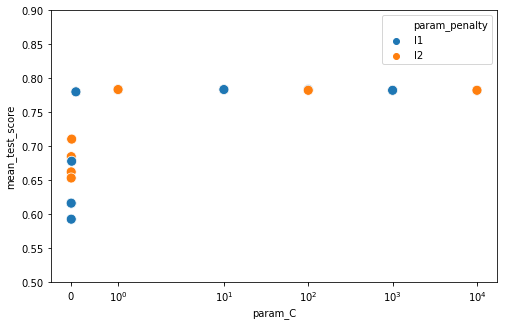

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df, s=100)
plt.xscale('symlog')
plt.ylim((0.5,0.9))
plt.show()

In [40]:
rs_cv = RandomizedSearchCV(estimator=m4_loj_1vsR,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs.head()

,param_penalty,param_C,mean_test_score
2,l2,10,0.727750
4,l1,100,0.726831
5,l2,1000,0.726831
8,l1,1000,0.726831
3,l2,1,0.724320


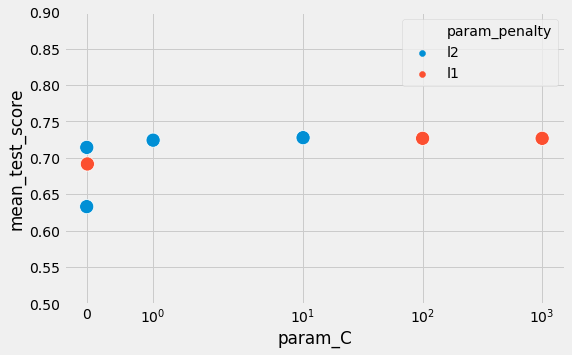

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.5,0.9))
plt.show()